In [1]:
# Read all .csv files in and aggregate them
import pandas as pd
import glob
import os

folder_path = '/Users/kenny/Downloads/SOUN'
all_files = glob.glob(os.path.join(folder_path, '*.csv'))

# Important parameters (ts_event, (action), (side), (depth), bid_px, ask_px, bid_sz, ask_sz, bid_ct, ask_ct)

combined_files = []

for file in all_files:
    df = pd.read_csv(file)
    df['ts_event'] = pd.to_datetime(df['ts_event'], errors='coerce')
    df = df.dropna(subset=['ts_event'])
    df['minute'] = df['ts_event'].dt.floor('T')
    price_cols = ['bid_px_00', 'ask_px_00', 'bid_sz_00', 'ask_sz_00',
                 'bid_px_01', 'ask_px_01', 'bid_sz_01', 'ask_sz_01',
                 'bid_px_02', 'ask_px_02', 'bid_sz_02', 'ask_sz_02',
                 'bid_px_03', 'ask_px_03', 'bid_sz_03', 'ask_sz_03',
                 'bid_px_04', 'ask_px_04', 'bid_sz_04', 'ask_sz_04',
                 'bid_px_05', 'ask_px_05', 'bid_sz_05', 'ask_sz_05',
                 'bid_px_06', 'ask_px_06', 'bid_sz_06', 'ask_sz_06',
                 'bid_px_07', 'ask_px_07', 'bid_sz_07', 'ask_sz_07',
                 'bid_px_08', 'ask_px_08', 'bid_sz_08', 'ask_sz_08',
                 'bid_px_09', 'ask_px_09', 'bid_sz_09', 'ask_sz_09']
    df_grouped = df.groupby('minute')[price_cols].mean().reset_index()
    combined_files.append(df_grouped)

full_df = pd.concat(combined_files, ignore_index=True)

In [2]:
full_df.shape

(8190, 41)

In [3]:
full_df.describe(include='all')

<ipython-input-3-ade51ceed394>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  full_df.describe(include='all')


,minute,bid_px_00,ask_px_00,bid_sz_00,ask_sz_00,bid_px_01,ask_px_01,bid_sz_01,ask_sz_01,bid_px_02,...,bid_sz_07,ask_sz_07,bid_px_08,ask_px_08,bid_sz_08,ask_sz_08,bid_px_09,ask_px_09,bid_sz_09,ask_sz_09
count,8190,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,...,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000
unique,8190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2025-04-08 19:55:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2025-04-03 13:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2025-05-02 19:59:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,8.443406,8.454824,2793.698618,2733.017344,8.433398,8.464833,5236.383271,4982.893091,8.423397,...,3080.703296,3107.246415,8.363381,8.534851,2737.022964,2850.376922,8.353374,8.544855,2588.019753,2723.972710
std,NaN,0.826829,0.826759,3471.658429,3315.896263,0.826830,0.826757,3108.033296,3607.600916,0.826830,...,3832.507776,3586.579397,0.826831,0.826752,4261.008918,3852.703239,0.826836,0.826748,4458.167725,4009.566032
min,NaN,6.549283,6.561813,228.077957,282.154345,6.539283,6.571813,162.189155,359.801527,6.529283,...,108.897590,90.000000,6.469283,6.641813,129.774194,99.974242,6.459283,6.651813,26.000000,100.000000
25%,NaN,7.814039,7.825448,1432.994427,1400.998282,7.804039,7.835448,3780.337992,3566.353059,7.794039,...,1600.000000,1569.004189,7.734039,7.905448,1264.114039,1241.800246,7.724039,7.915448,1077.695624,1042.251781


In [4]:
full_df.head(10)

,minute,bid_px_00,ask_px_00,bid_sz_00,ask_sz_00,bid_px_01,ask_px_01,bid_sz_01,ask_sz_01,bid_px_02,...,bid_sz_07,ask_sz_07,bid_px_08,ask_px_08,bid_sz_08,ask_sz_08,bid_px_09,ask_px_09,bid_sz_09,ask_sz_09
0,2025-04-03 13:30:00+00:00,7.986782,8.004861,1274.564155,1287.180244,7.976687,8.014878,2215.515954,2547.675492,7.966687,...,1489.470129,1253.429735,7.906246,8.088652,2803.962322,1036.323489,7.896246,8.099246,2298.825187,681.978615
1,2025-04-03 13:31:00+00:00,8.131975,8.148272,830.049516,700.264801,8.121975,8.158579,2242.339612,2241.898278,8.111975,...,1541.079117,773.321851,8.051975,8.228579,584.255651,295.962863,8.041975,8.238579,440.986545,440.777718
2,2025-04-03 13:32:00+00:00,8.129682,8.145496,1132.164881,950.406153,8.119661,8.155506,2788.642240,2650.039751,8.109661,...,649.423436,1272.698583,8.049661,8.225506,244.040442,508.349119,8.039661,8.235506,144.585551,331.746975
3,2025-04-03 13:33:00+00:00,8.179486,8.194828,849.505637,734.643568,8.169486,8.204828,2988.126326,2365.473475,8.159486,...,1202.560676,742.724138,8.099486,8.274828,795.549072,787.532493,8.089486,8.284828,622.530836,934.968833
4,2025-04-03 13:34:00+00:00,8.173773,8.190339,919.858563,711.506100,8.163773,8.200343,3169.663353,2435.142793,8.153773,...,1260.502937,828.881609,8.093773,8.270343,689.228197,810.979666,8.083773,8.280343,303.034343,660.527338
5,2025-04-03 13:35:00+00:00,8.143595,8.156895,1599.941481,599.358280,8.133595,8.166895,3576.689092,2050.314490,8.123595,...,956.360669,1676.854299,8.063595,8.236895,824.784236,835.785430,8.053595,8.246895,583.638535,603.098328
6,2025-04-03 13:36:00+00:00,8.054232,8.066501,1324.343302,971.704629,8.044232,8.076501,3107.262188,2645.009013,8.034232,...,786.811962,1116.777550,7.974232,8.146501,617.639082,667.365014,7.964232,8.156501,504.336338,588.345350
7,2025-04-03 13:37:00+00:00,8.035614,8.047797,2300.001011,722.824154,8.025614,8.057797,5495.377969,3110.992420,8.015614,...,969.959070,1118.622031,7.955614,8.127797,672.087923,425.879232,7.945614,8.137797,348.501263,333.547751
8,2025-04-03 13:38:00+00:00,8.048082,8.061611,2433.037998,786.349288,8.038082,8.071611,6200.685787,3847.576544,8.028082,...,1000.668615,903.708440,7.968082,8.141611,684.154549,386.508221,7.958082,8.151611,639.996346,279.962368
9,2025-04-03 13:39:00+00:00,8.071889,8.085458,592.849673,973.537908,8.061889,8.095458,2464.518954,2982.914379,8.051889,...,1426.362745,615.741176,7.991889,8.165458,1356.443137,267.853595,7.981889,8.175458,1044.468627,224.143137


In [5]:
# Calculate Spread/Midprice
full_df['spread'] = full_df['ask_px_00'] - full_df['bid_px_00']
full_df['mid_price'] = (full_df['ask_px_00'] + full_df['bid_px_00']) / 2

full_df['imbalance'] = (full_df['bid_sz_00'] - full_df['ask_sz_00']) / (full_df['bid_sz_00'] + full_df['ask_sz_00'])
full_df['beta_t'] = full_df['spread'] / (full_df['bid_sz_00'] + full_df['ask_sz_00'])

full_df = full_df.replace([float('inf'), -float('inf')], pd.NA).dropna()

# Simulate market order execution and compute slippage.
import numpy as np

def compute_gtX(row, x, side='buy', levels=5):
    try:
        if side == 'buy':
            prices = [row[f'ask_px_0{i}'] for i in range(levels)]
            sizes = [row[f'ask_sz_0{i}'] for i in range(levels)]
        else:
            prices = [row[f'bid_px_0{i}'] for i in range(levels)]
            sizes = [row[f'bid_sz_0{i}'] for i in range(levels)]
        
        # Check for NaNs or missing values
        if any(pd.isnull(p) or pd.isnull(s) for p, s in zip(prices, sizes)):
            return np.nan

        remaining = x
        cost = 0
        for p, s in zip(prices, sizes):
            if remaining <= s:
                cost += p * remaining
                remaining = 0
                break
            else:
                cost += p * s
                remaining -= s
        
        if remaining > 0:
            return np.nan  # Not enough liquidity

        avg_price = cost / x
        # Check for mid-price components
        if pd.isnull(row['ask_px_00']) or pd.isnull(row['bid_px_00']):
            return np.nan
        mid_price = (row['ask_px_00'] + row['bid_px_00']) / 2
        slippage = avg_price - mid_price
        return slippage

    except KeyError:
        return np.nan  # Handles case where expected columns are missing

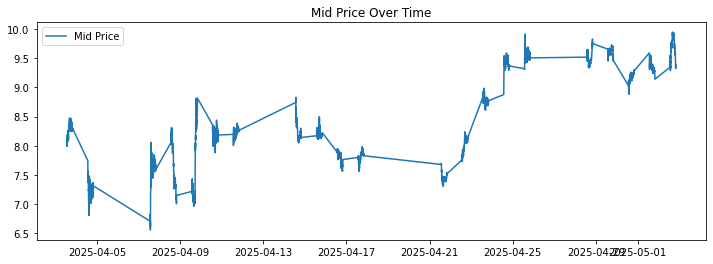

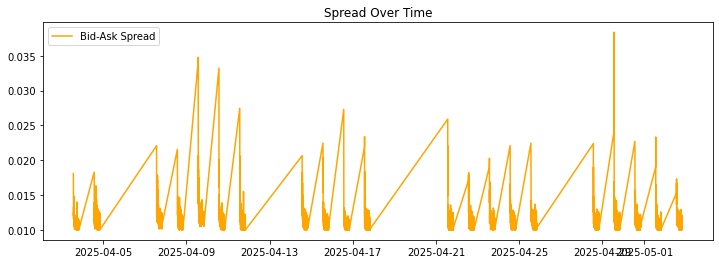

In [6]:
# Plot Spread/Midprice
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.plot(full_df['minute'], full_df['mid_price'], label='Mid Price')
plt.title("Mid Price Over Time")
plt.legend()
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(full_df['minute'], full_df['spread'], label='Bid-Ask Spread', color='orange')
plt.title("Spread Over Time")
plt.legend()
plt.show()

In [7]:
# Testing intervals
import numpy as np

X_values = [5, 50, 100, 200, 500, 1000]

slippage_total = []

for X in X_values:
    slippages = []
    for idx, row in full_df.iterrows():
        if X <= row['ask_sz_00']:
            slippage = compute_gtX(row, X)
            slippages.append(slippage)
    avg_slippage = np.mean(slippages)
    slippage_total.append((X, avg_slippage))

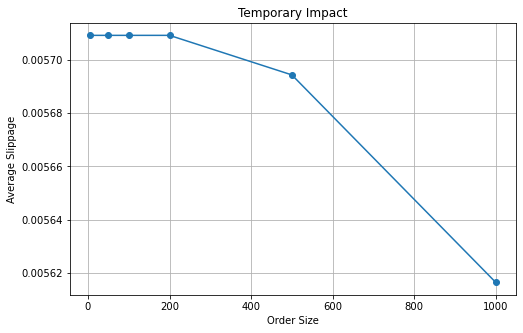

In [8]:
# Plot gt(X) vs X
import matplotlib.pyplot as plt
X_plot, gtX_plot = zip(*slippage_total)
plt.figure(figsize=(8,5))
plt.plot(X_plot, gtX_plot, marker='o')
plt.xlabel('Order Size')
plt.ylabel('Average Slippage')
plt.title('Temporary Impact')
plt.grid()
plt.show()

In [9]:
# Linear
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

def fit_linear_beta(row, sizes=[10, 25, 50]):
    X, y = [], []
    for size in sizes:
        slip = compute_gtX(row, size)
        if not np.isnan(slip):
            X.append([size])
            y.append(slip)
    if len(X) >= 2:
        model = LinearRegression().fit(X, y)
        return model.coef_[0]
    return np.nan

full_df['beta_t'] = df.apply(lambda row: fit_linear_beta(row), axis=1)
full_df['imbalance'] = (full_df['bid_sz_00'] - full_df['ask_sz_00']) / (full_df['bid_sz_00'] + full_df['ask_sz_00'])
df_model = full_df[['spread', 'imbalance', 'mid_price', 'beta_t']].dropna()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

features = ['spread', 'mid_price', 'imbalance']
X = df_model[features]
y = df_model['beta_t']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MSE: 1.8507298773409336e-09
R² Score: -0.0027021200422718827


In [11]:
# Polynomial (Based on linear modelling)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
poly_y_pred = poly_model.predict(X_test_poly)

print("MSE:", mean_squared_error(y_test, poly_y_pred))
print("R²:", r2_score(y_test, poly_y_pred))

MSE: 1.8568995503587238e-09
R²: -0.0060447711177460395


In [12]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest:")
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R²:", r2_score(y_test, y_pred_rf))

Random Forest:
MSE: 1.9234003031398708e-09
R²: -0.042074040766684195


In [13]:
'''
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Fit polynomial regression
poly_pipeline = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_pipeline.fit(X_train, y_train)

# Predict
df_model['beta_poly'] = poly_pipeline.predict(X)
'''

"\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn.preprocessing import PolynomialFeatures\nfrom sklearn.pipeline import make_pipeline\n\n# Fit polynomial regression\npoly_pipeline = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())\npoly_pipeline.fit(X_train, y_train)\n\n# Predict\ndf_model['beta_poly'] = poly_pipeline.predict(X)\n"

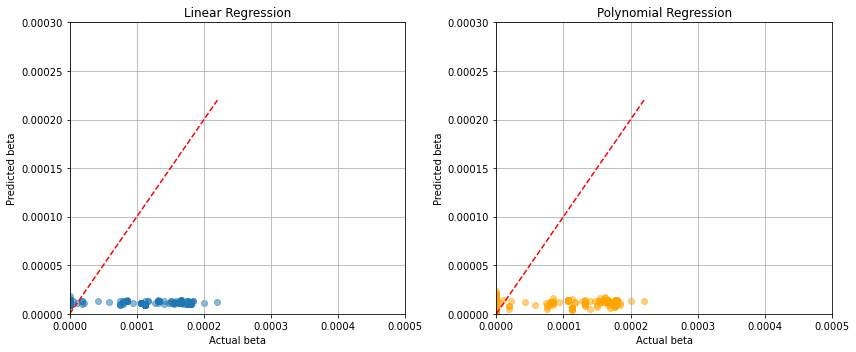

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))

# Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlim(0, 0.0005)
plt.ylim(0, 0.0003)
plt.xlabel("Actual beta")
plt.ylabel("Predicted beta")
plt.title("Linear Regression")
plt.grid()

# Polynomial Regression
plt.subplot(1, 2, 2)
plt.scatter(y_test, poly_y_pred, alpha=0.5, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlim(0, 0.0005)
plt.ylim(0, 0.0003)
plt.xlabel("Actual beta")
plt.ylabel("Predicted beta")
plt.title("Polynomial Regression")
plt.grid()

plt.tight_layout()
plt.show()

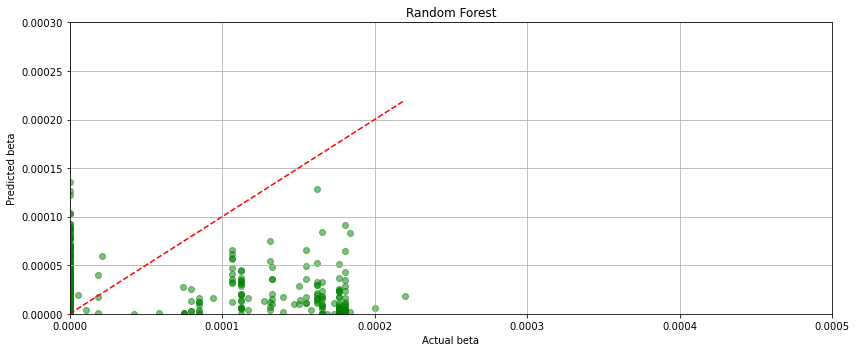

In [15]:
# Random Forest
plt.figure(figsize=(12, 5))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual beta")
plt.ylabel("Predicted beta")
plt.title("Random Forest")

plt.xlim(0, 0.0005)
plt.ylim(0, 0.0003)
plt.grid()
plt.tight_layout()
plt.show()

                        minute       gtX
0    2025-04-03 13:30:00+00:00  0.009039
1    2025-04-03 13:31:00+00:00  0.008149
2    2025-04-03 13:32:00+00:00  0.007907
3    2025-04-03 13:33:00+00:00  0.007671
4    2025-04-03 13:34:00+00:00  0.008283
...                        ...       ...
8185 2025-05-02 19:55:00+00:00  0.005455
8186 2025-05-02 19:56:00+00:00  0.005493
8187 2025-05-02 19:57:00+00:00  0.005199
8188 2025-05-02 19:58:00+00:00  0.005473
8189 2025-05-02 19:59:00+00:00  0.005288

[8190 rows x 2 columns]
gtX Min: 0.00499999999994305 | Max: 0.019180672268957366


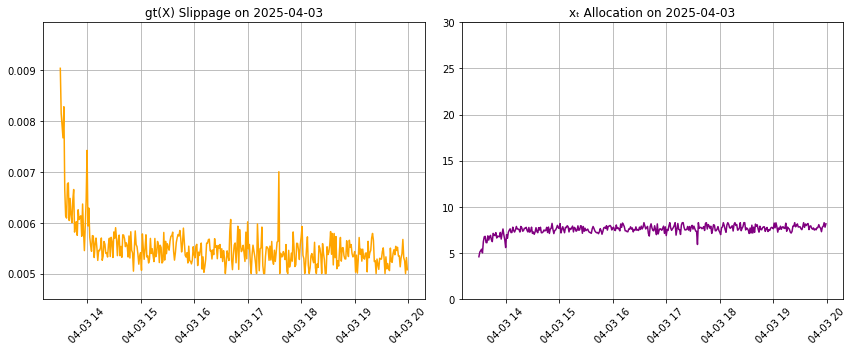

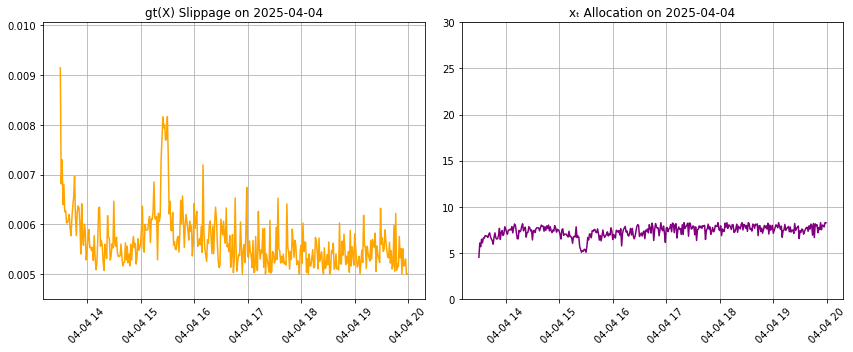

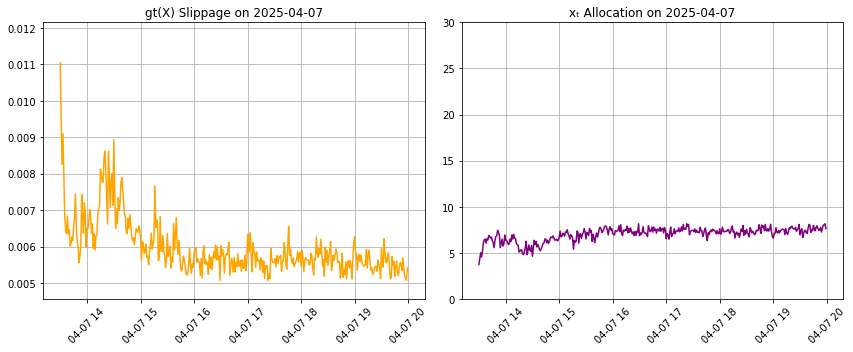

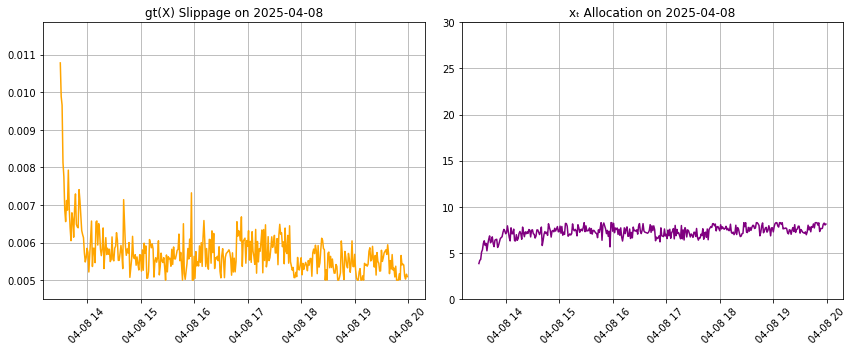

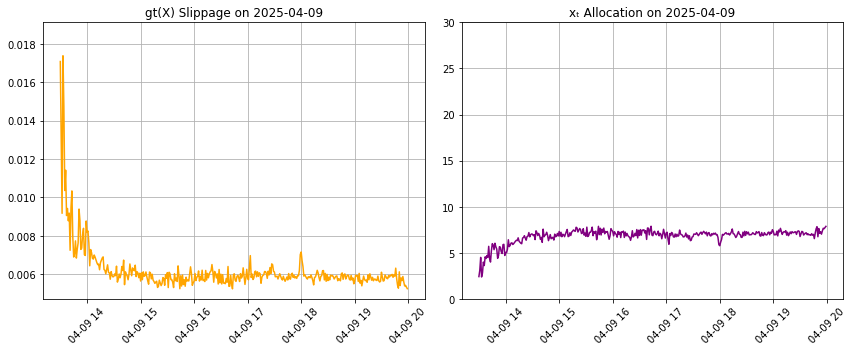

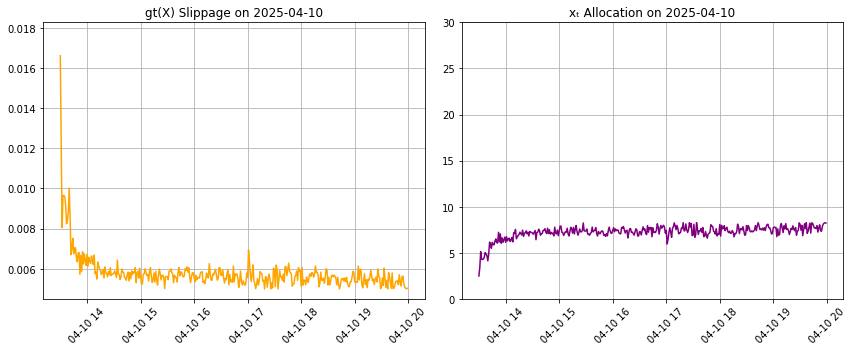

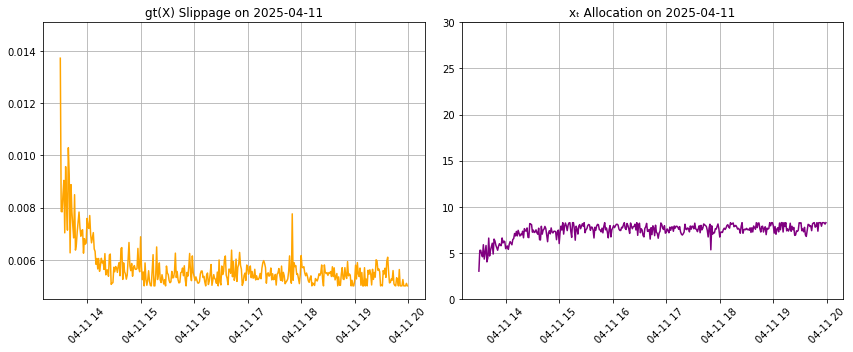

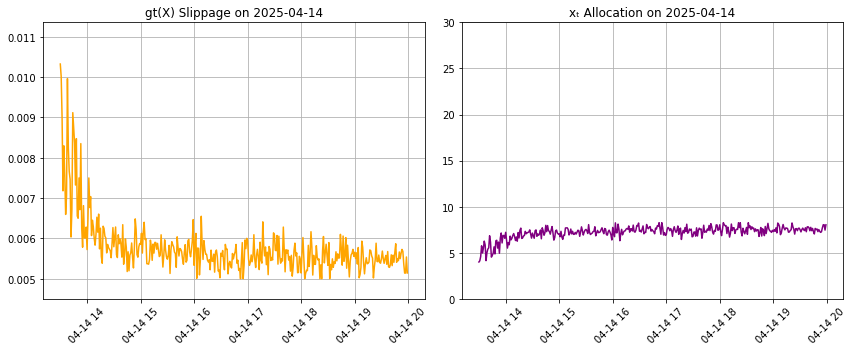

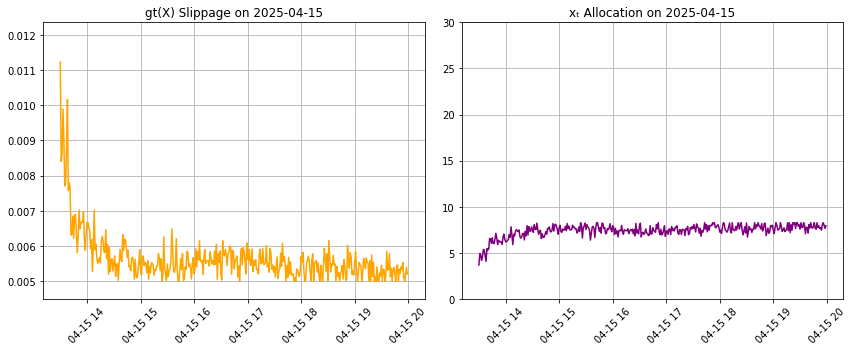

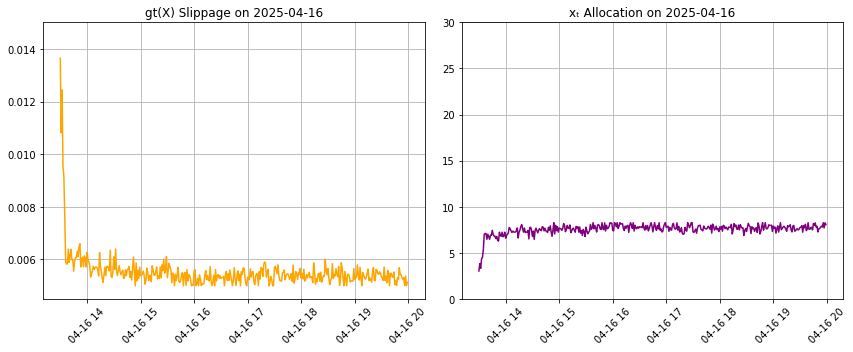

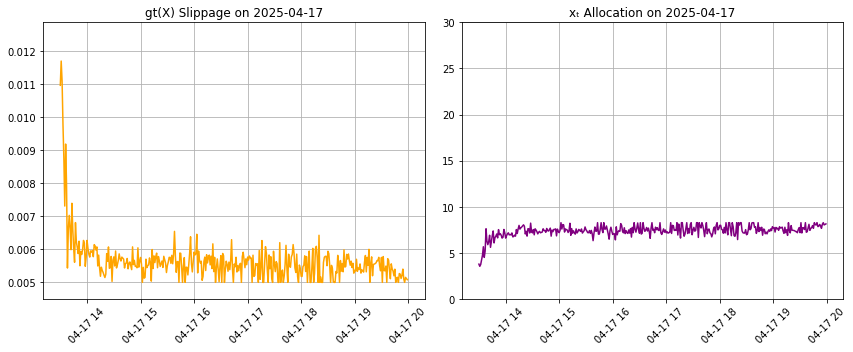

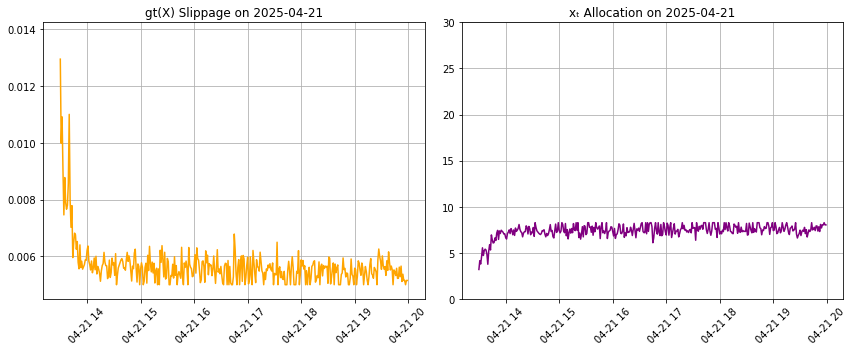

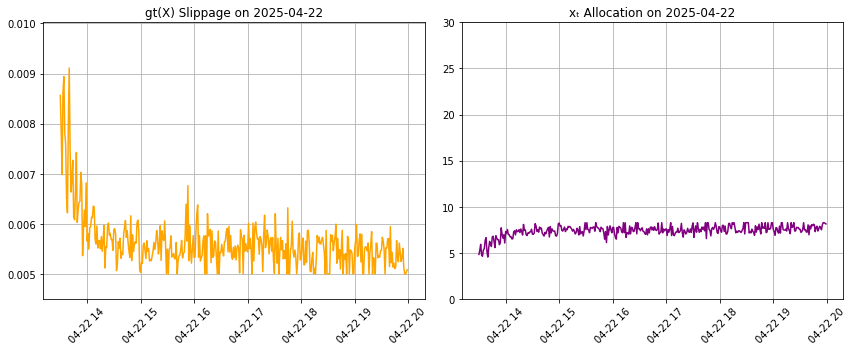

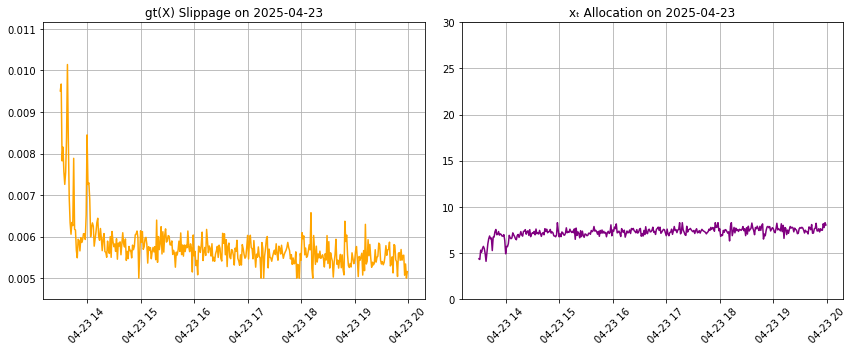

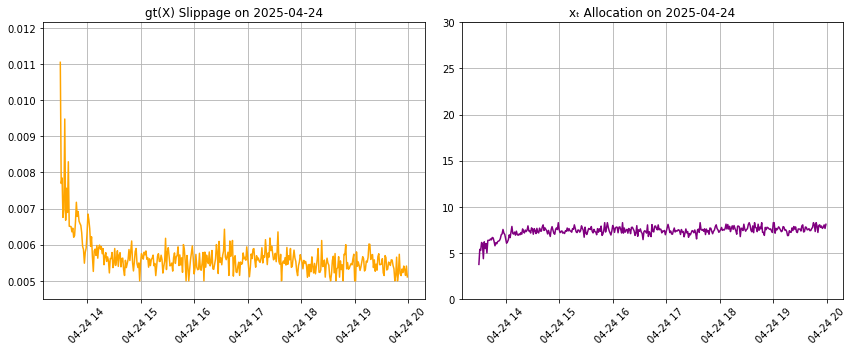

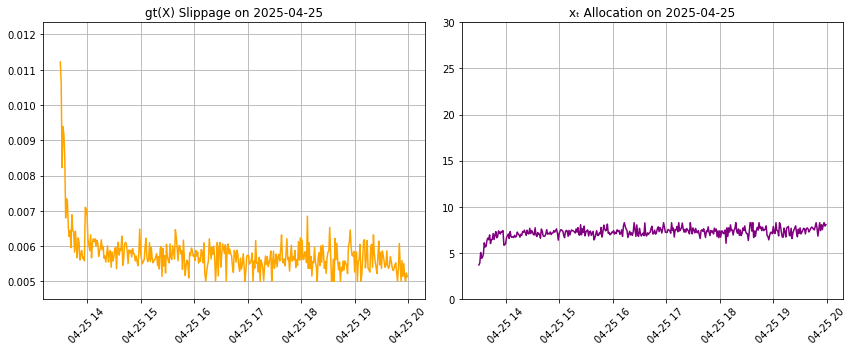

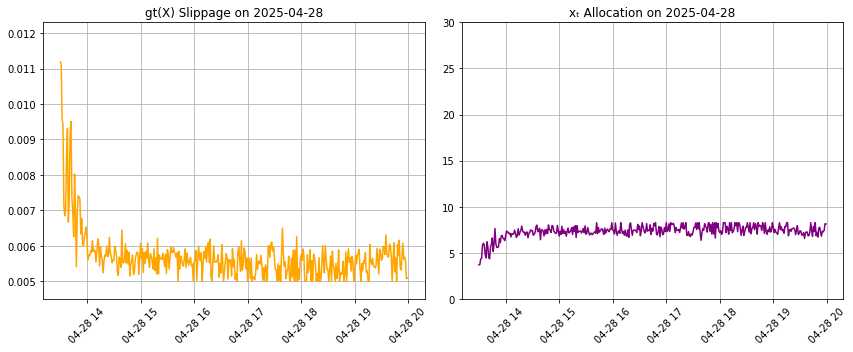

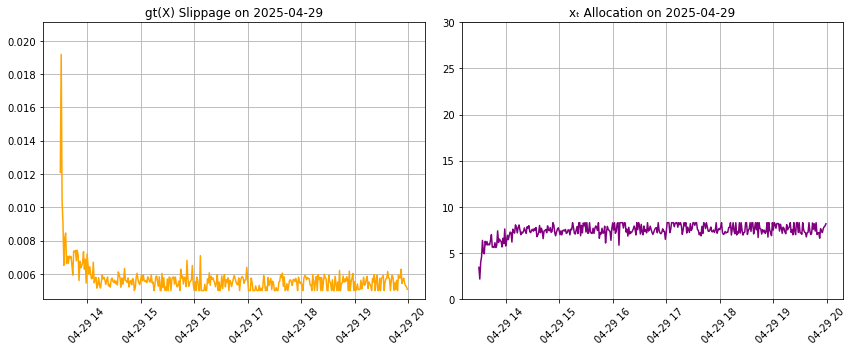

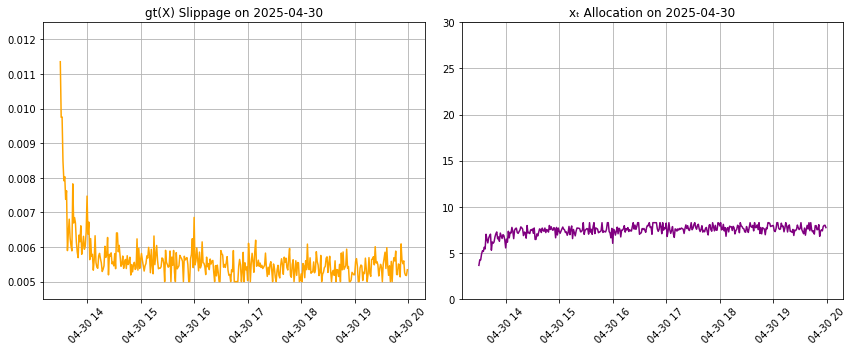

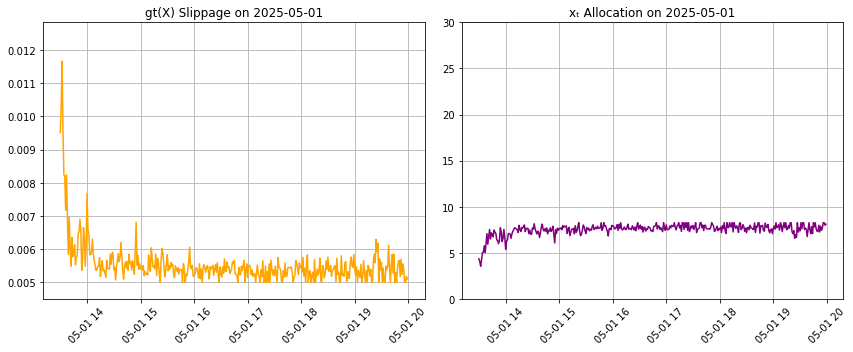

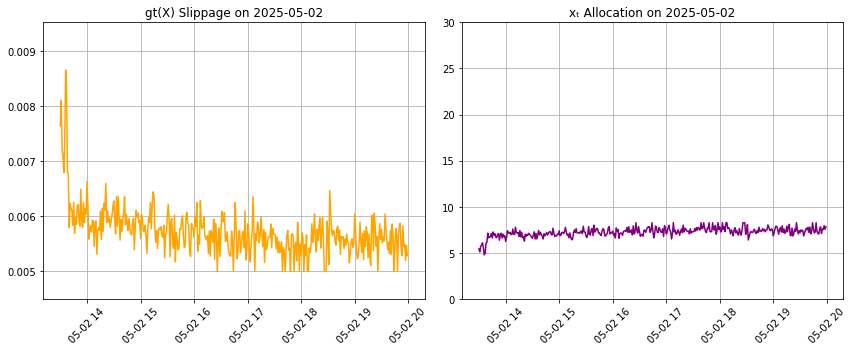

In [16]:
import matplotlib.pyplot as plt

# Parameters
S = 60000
X_order = 100
xt_ylim = (0, 30)

# Compute gt(X) and allocate xₜ
full_df['gtX'] = full_df.apply(lambda row: compute_gtX(row, X_order), axis=1)
full_df = full_df.dropna(subset=['gtX'])
full_df = full_df[full_df['gtX'] > 1e-8]
full_df['x_t'] = S * (1 / full_df['gtX']) / (1 / full_df['gtX']).sum()
full_df['date'] = full_df['minute'].dt.date

# Print summary stats
print(full_df[['minute', 'gtX']])
print("gtX Min:", full_df['gtX'].min(), "| Max:", full_df['gtX'].max())

# Plot gt(X) and xₜ for each day
for date, day_df in full_df.groupby('date'):
    if day_df['gtX'].isna().all():
        continue
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    axs[0].plot(day_df['minute'], day_df['gtX'], color='orange')
    axs[0].set_title(f"gt(X) Slippage on {date}")
    axs[0].set_ylim(day_df['gtX'].min() * 0.9, day_df['gtX'].max() * 1.1)
    axs[0].tick_params(axis='x', rotation=45)
    axs[0].grid()

    axs[1].plot(day_df['minute'], day_df['x_t'], color='purple')
    axs[1].set_title(f"xₜ Allocation on {date}")
    axs[1].set_ylim(xt_ylim)
    axs[1].tick_params(axis='x', rotation=45)
    axs[1].grid()

    plt.tight_layout()
    plt.show()
